
reference 

https://www.eecis.udel.edu/~boncelet/ipython.html

University of Delaware

Professor and Associate Chair

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


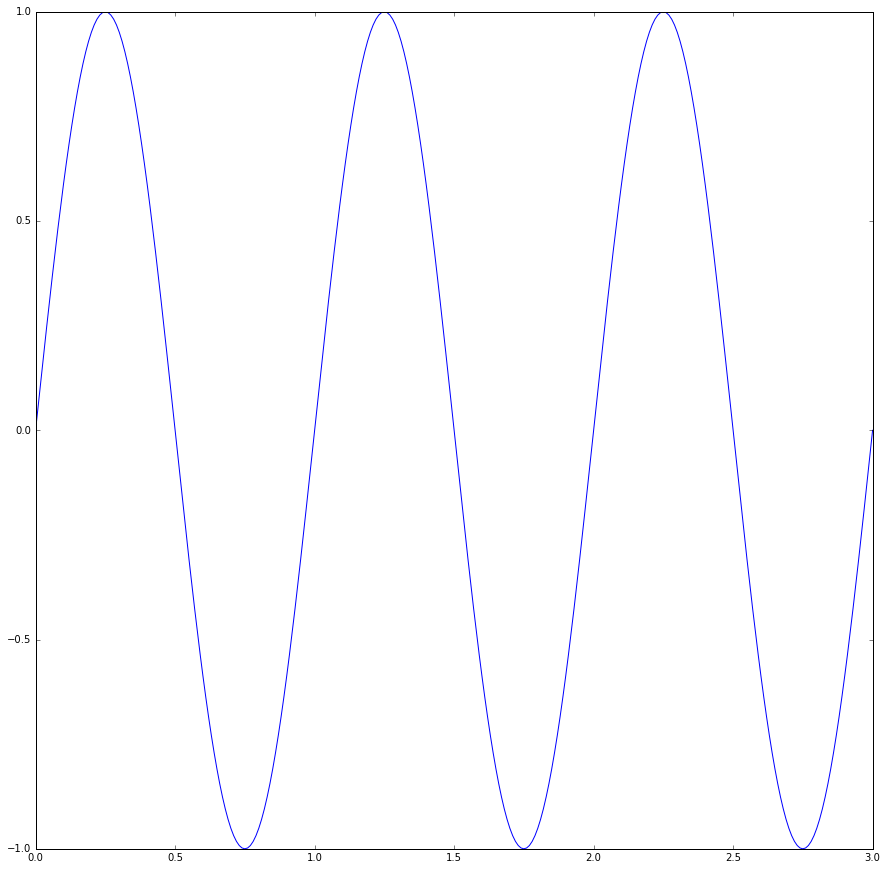

In [2]:
figure(figsize=(15, 15))
f = 1
Fs = 100 #a lot more than twice per period
t = linspace(0,3,3*Fs+1)
y = sin(2*pi*f*t)
plot(t,y)

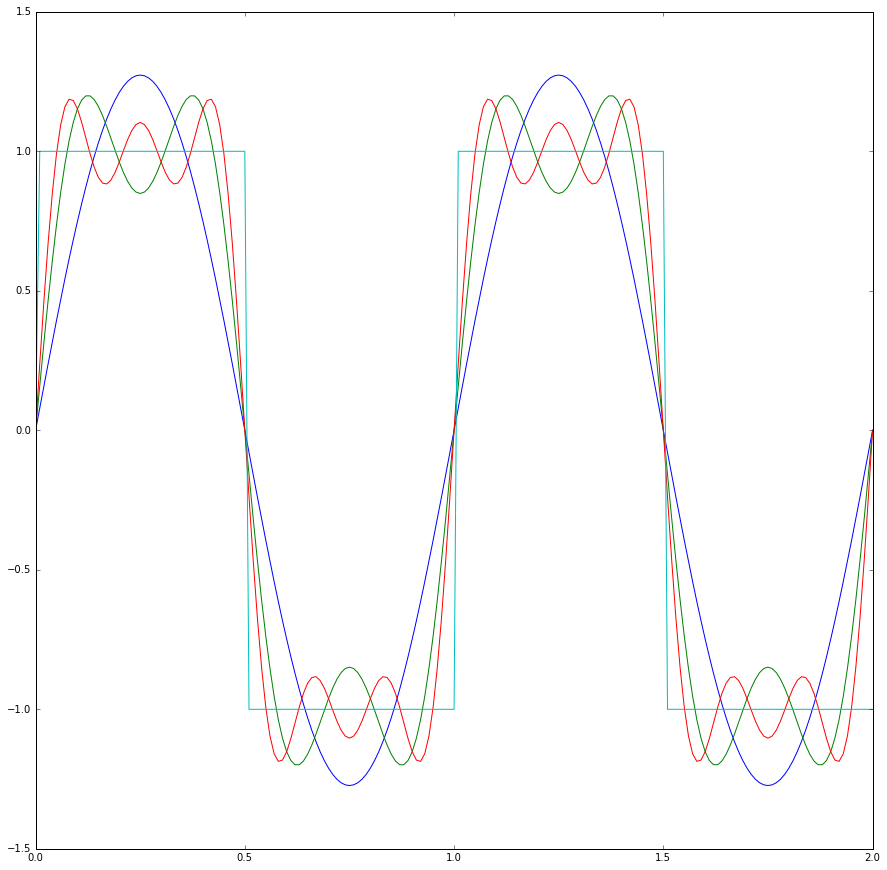

In [3]:
figure(figsize=(15, 15))
t = linspace(0,2,201) #two cycles, 100 points each
y1 = (4/pi)*sin(2*pi*f*t)
y3 = y1 + (4/(3*pi))*sin(2*pi*3*f*t)
y5 = y3 + (4/(5*pi))*sin(2*pi*5*f*t)
sqwave = sign(sin(2*pi*f*t)) #an actual square wave
plot(t,y1, t,y3, t,y5, t, sqwave)

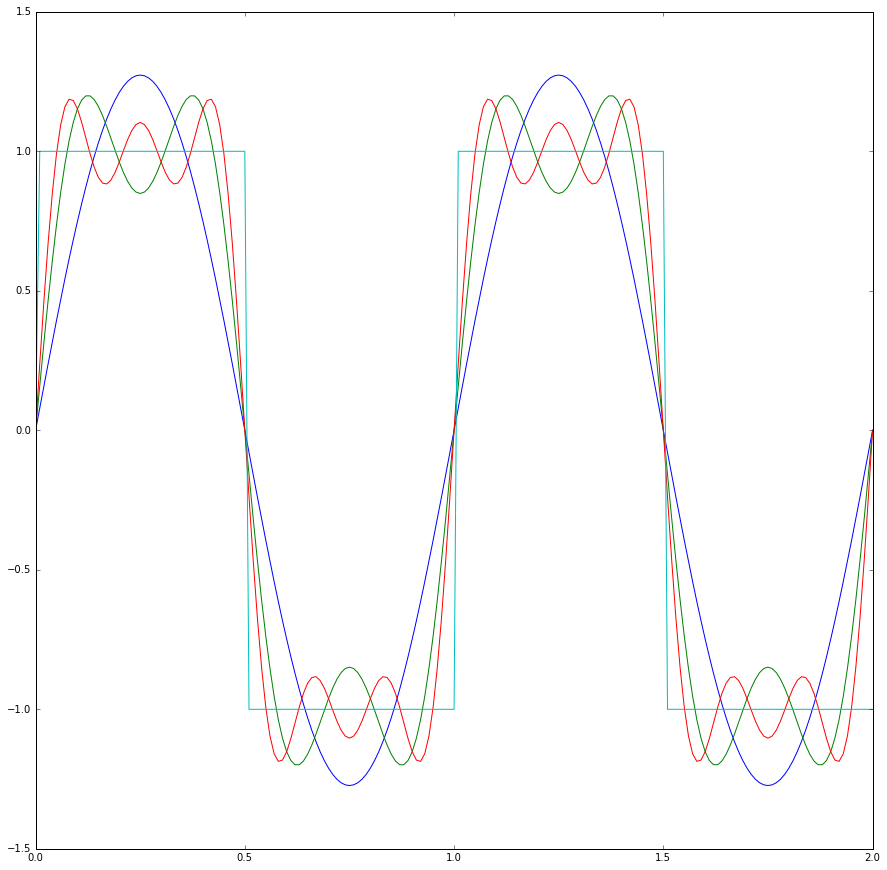

In [4]:
figure(figsize=(15, 15))

t = linspace(0,2,201) #two cycles, 100 points each
y1 = (4/pi)*sin(2*pi*f*t)
y3 = y1 + (4/(3*pi))*sin(2*pi*3*f*t)
y5 = y3 + (4/(5*pi))*sin(2*pi*5*f*t)
sqwave = sign(sin(2*pi*f*t)) #an actual square wave
plot(t,y1, t,y3, t,y5, t, sqwave)

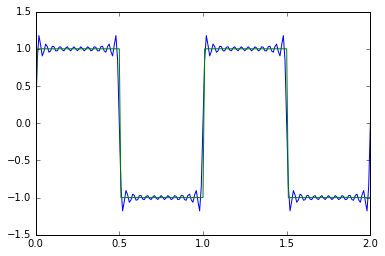

In [5]:
sq = zeros(len(t)) #preallocate the output array
for h in arange(1,25,2):
    sq += (4/(pi*h))*sin(2*pi*f*h*t)

plot(t,sq, t,sqwave)

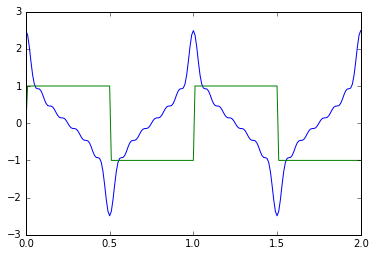

In [6]:
not_sq = zeros(len(t))
for h in arange(1,15,2):
    not_sq += (4/(pi*h))*cos(2*pi*f*h*t)

plot(t,not_sq, t,sqwave)

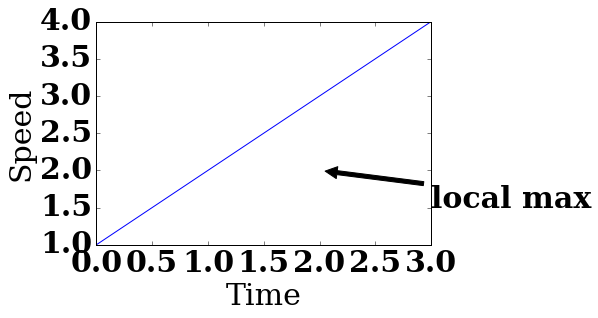

In [10]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4], label='Normal')
plt.ylabel = 'some numbers'
plt.title = 'Histogram of IQ'
plt.annotate('local max', xy=(2, 2), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )


pylab.xlabel("Time")
pylab.ylabel("Speed")

In [12]:
import matplotlib.pyplot as plt

In [113]:
from scipy import signal


font = {'family' : 'serif',
        'weight' : 'black',
        'size'   : 30}
matplotlib.rc('font', **font)

def minus_to_zero(l):
    return list(map(lambda elem: elem if elem == 1 else 0, l))


def pwm_generator(l, amp=1, duty=0.5):
    return (lambda duty:
                list(map(lambda elem: 0 if elem < duty else amp, l))
           )((1-duty)*amp)


def make_square_odd(freq=1, amp=1, duty=0.5):
    return (lambda square: 
                pwm_generator(abc, amp, duty)
           )(amp * abs(signal.sawtooth(2 * np.pi * 1 * t)))


def set_basic_graph():
    figure(figsize=(15, 15))
    t = linspace(-3,3,1000) # precision : 1000 (x axis)
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.ylim(-2, 2)
    plt.xlim(-1, 1)

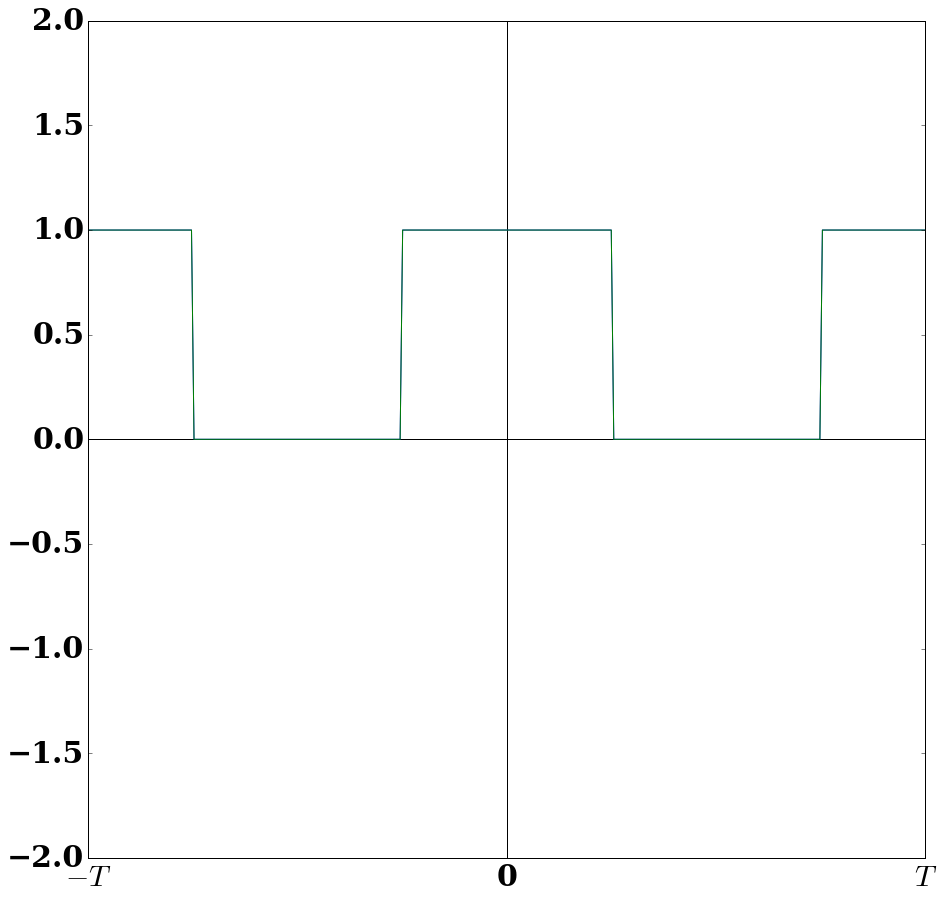

In [112]:
# make square wave using sawtooth
# indirection solution
    
plt_set()

# Additional graph config
x_range = range(-1, 2)
x_labels = [r"$-T$", 0, r"$T$"]
plt.xticks(x_range, x_labels)

plt.plot(t, make_square_odd())